In [11]:
# Logistic Regression & SVM on Iris Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score, classification_report, roc_auc_score, roc_curve
)
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
iris = load_iris()
X = iris.data[:, [0, 2]]  # Sepal length and Petal length
y = (iris.target == 0).astype(int)  # Binary classification: Setosa (1) vs Non-Setosa (0)


In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
### Logistic Regression ###
lg = LogisticRegression()
lg.fit(X_train_std, y_train)
y_pred_lg = lg.predict(X_test_std)
y_prob_lg = lg.predict_proba(X_test_std)[:, 1]

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lg))
print("Classification Report:\n", classification_report(y_test, y_pred_lg))

Logistic Regression Results
Accuracy: 1.0
Confusion Matrix:
 [[20  0]
 [ 0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



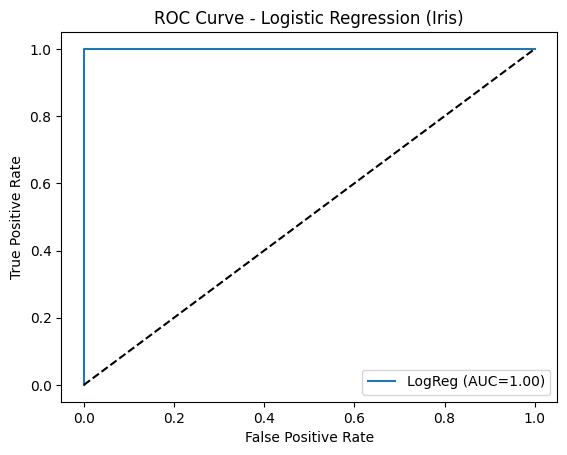

In [10]:
# ROC-AUC
roc_auc_lg = roc_auc_score(y_test, y_prob_lg)
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_prob_lg)

plt.plot(fpr_lg, tpr_lg, label=f"LogReg (AUC={roc_auc_lg:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Iris)")
plt.legend()
plt.show()

In [7]:
### Support Vector Machine ###
svm = SVC(probability=True)
svm.fit(X_train_std, y_train)
y_pred_svm = svm.predict(X_test_std)
y_prob_svm = svm.predict_proba(X_test_std)[:, 1]

print("\nSupport Vector Machine Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine Results
Accuracy: 1.0
Confusion Matrix:
 [[20  0]
 [ 0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



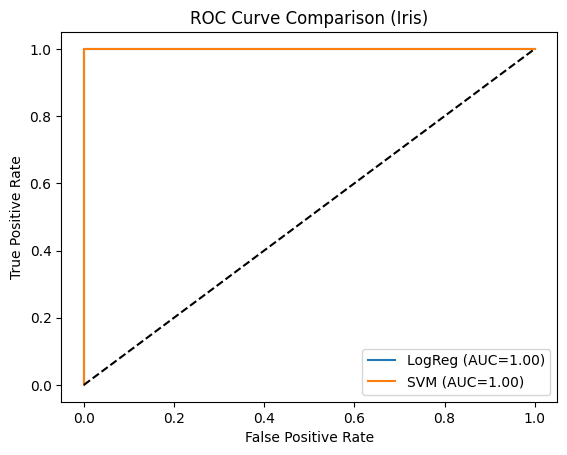

In [9]:
# ROC-AUC
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.plot(fpr_lg, tpr_lg, label=f"LogReg (AUC={roc_auc_lg:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={roc_auc_svm:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Iris)")
plt.legend()
plt.show()